## Assignment 2 Data Analysis using Pandas

This assignment will contain 2 question with details as below. The due date is October 23 (Sunday), 2022 23:59PM. Each late day will result in 20% loss of total points.

### Question 1 (20 points) Datacamp courses

Datacamp is the online learning platform for data science courses and modules. As the only collaborator in Portugal, this course provides free access to the students in Business Analytics as the complementary resource. For this assignment, you are expected to complete the following moduels and submit your completion badges:

- [Importing & Cleaning Data with Python](https://app.datacamp.com/learn/skill-tracks/importing-cleaning-data-with-python)
- [Data Manipulation with Python](https://app.datacamp.com/learn/skill-tracks/data-manipulation-with-python)

Each badge will account for 10 points. If you are confident with the knowledge, you may skip the videos and directly finish the challenges. You can submit the badge by the end of the October if you would need more time. 

### Question 2 (80 points) Celluloid ceiling

Wonder Woman             |  Captain Marvel
:-------------------------:|:-------------------------:
![wonderwoman](https://upload.wikimedia.org/wikipedia/en/4/4f/Wonder_Woman_1984_poster.png) | ![marvel](https://upload.wikimedia.org/wikipedia/pt/5/59/Captain_Marvel_%282018%29.jpg)

Women are involved in the film industry in all roles, including as film directors, actresses, cinematographers, film producers, film critics, and other film industry professions, though women have been underrepresented in all these positions. Studies found that women have always had a presence in film acting, but have consistently been underrepresented, and on average significantly less well paid. 

In 2015, Forbes reported that "...just 21 of the 100 top-grossing films of 2014 featured a female lead or co-lead, while only 28.1% of characters in 100 top-grossing films were female... This means it’s much rarer for women to get the sort of blockbuster role which would warrant the massive backend deals many male counterparts demand (Tom Cruise in Mission: Impossible or Robert Downey Jr. in Iron Man, for example)".

Also, Forbes' analysis of US acting salaries in 2013 determined that the "...men on Forbes’ list of top-paid actors for that year made 2½ times as much money as the top-paid actresses. That means that Hollywood's best-compensated actresses made just 40 cents for every dollar that the best-compensated men made. 


In this assignment, we want to examine whether and how women representation is lacking in the film industry. We will adopt The Bechdel test as a measure of the representation of women in the film industry. The test is named after the American cartoonist Alison Bechdel in whose 1985 comic strip Dykes to Watch Out For the test first appeared. **A movie is said to meet the Bechdel test  following three criteria: (1) it has to have at least two women in it, who (2) who talk to each other, about (3) something besides a man.**

We are going to obtain the data ourselves to perform the analysis. Specifically, we will retrieve the movie metadata from IMDB (Internet Movie Database), an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users.


The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. We will focus on these famous movies in this analysis:

**Question 2.1** (25 points): We will retrieve the metadata of IMDb Top 250 movies from the [IMDb charts](https://www.imdb.com/chart/top/). For each movie on the list, we can scrape the following characteristics from the information page. For example, from the [page of top rated movie "The Shawshank Redemption"](https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=F4QFC0SVZN1HTDHCY3C0&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1), we want to extract the metadata about this movie as:
- IMDb id (0111161)
- Movie name (The Shawshank Redemption)
- Year (1994)
- Director (Frank Darabont)
- Stars (Tim Robbins, Morgan Freeman, Bob Gunton)
- Rating (9.3)
- Number of reviews (2.6M)
- Genres (Drama)
- Country (USA)
- Language (English)
- Budget (\$25,000,000)
- Gross box Office Revenue (\$28,884,504)

![imdb](https://mrfloris.com/files/images/imdb-top250-page-start.png)


After scraping the 250 movies, save the data as a dataframe ```imdb_top_movies```. 

Also, saving the dataframe to a local file ```imdb_top_movies.csv``` so that later you can load it without scraping the website twice.

Hint: You can get the links to these movies from the IMDb top chart page, and then scrape each movie page by sending the request to these links. At each movie page, the information requested are located at different sections. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
#for parsing through the website
page = requests.get("https://www.imdb.com/chart/top/")
soup = BeautifulSoup(page.content, 'html.parser')

dictlist = []

links1 = soup.find('table', {"data-caller-name" : "chart-top250movie"})
for link in links1.find_all('td', attrs={'class' : "titleColumn"}):
    links = ("https://www.imdb.com/" + str(link.a['href']))

    page = requests.get(links)
    soup = BeautifulSoup(page.content, 'html.parser')

    #id
    Id = soup.find('meta', property='imdb:pageConst')
    MovieID = Id['content'][2:9]
   

    #title
    title = soup.find('h1').text 

    #director
    director = soup.find('a', class_="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link").text
      
    #stars
    stars = []
    star1 = soup.find_all('a', class_="sc-bfec09a1-1 gfeYgX")
    count = 0
    for person in star1:
        count += 1
        while count <= 3:
            x = person.text
            stars.append(x)
            break
    

    #rating
    rating = soup.find('span', class_="sc-7ab21ed2-1 jGRxWM").text
    
    #rewnumbers
    reviews = soup.find('span', class_="score").text

    #genre
    genre = soup.find('span', class_="ipc-chip__text", rel="").text


    #country 
    country = []
    countries1 = soup.find('li', {"data-testid" : "title-details-origin"})
    for country1 in countries1.findAll('a', class_= "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"):
        country.append(country1.get_text())
 

    #language
    language = []
    lang = soup.find('li', {"data-testid" : "title-details-languages"})
    for languages in lang.findAll('a', class_= "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"):
        language.append(languages.get_text())
               

    #budget NEED FIX BECAUSE NEEDS TO REMOVE (ESTIMATED)
    budget = []
    budg = soup.find('li', {"data-testid" : "title-boxoffice-budget"})
    try:
        for bud in budg.find_all('span', class_="ipc-metadata-list-item__list-content-item"):
                budget.append(bud.get_text())
    except:
        budget.append('None')      
    
    #revenue
    revenue = []
    grr = soup.find('li', {"data-testid" : "title-boxoffice-cumulativeworldwidegross"})
    try:
        for gror in grr.findAll('span', class_="ipc-metadata-list-item__list-content-item"):
            revenue.append(gror.get_text())
    except:
        revenue.append('None')
    

    #Year 
    year = soup.find('span', class_="sc-8c396aa2-2 itZqyK").text
    
    runtime = str(soup.find(class_='ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact ipc-metadata-list--base').find(class_='ipc-metadata-list__item').get_text()[7:])
    
    
    data = { "imdbid": MovieID, "Name": title,"Year": year ,"Director": director ,"Stars": stars , "Rating":  rating, "Nr. of Reviews": reviews, "Genres": genre, "Country": country,"Language": language, "Budget": budget, "Gross box Office Revenue": revenue, "Run Time": runtime}
    dictlist.append(data)
    
imdb_top_movies = pd.DataFrame(dictlist)
display(imdb_top_movies)

imdb_top_movies.to_csv("imdb_top_movies.csv", index=False)

,imdbid,Name,Year,Director,Stars,Rating,Nr. of Reviews,Genres,Country,Language,Budget,Gross box Office Revenue,Run Time
0,0111161,Os Condenados de Shawshank,1994,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,10.4K,Drama,[United States],[English],"[$25,000,000 (estimated)]","[$28,884,504]",2 hours 22 minutes
1,0068646,O Padrinho,1972,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",9.2,5.1K,Crime,[United States],"[English, Italian, Latin]","[$6,000,000 (estimated)]","[$250,341,816]",2 hours 55 minutes
2,0468569,O Cavaleiro das Trevas,2008,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,8.3K,Action,"[United States, United Kingdom]","[English, Mandarin]","[$185,000,000 (estimated)]","[$1,006,234,167]",2 hours 32 minutes
3,0071562,O Padrinho: Parte II,1974,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,1.3K,Crime,[United States],"[English, Italian, Spanish, Latin, Sicilian]","[$13,000,000 (estimated)]","[$47,961,919]",3 hours 22 minutes
4,0050083,Doze Homens em Fúria,1957,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",9.0,2K,Crime,[United States],[English],"[$350,000 (estimated)]",[$955],1 hour 36 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0071411,Dersu Uzala - A Águia da Estepe,1975,Akira Kurosawa,"[Maksim Munzuk, Yuriy Solomin, Mikhail Bychkov]",8.2,119,Adventure,"[Soviet Union, Japan]","[Russian, Chinese]","[$4,000,000 (estimated)]","[$14,480]",2 hours 22 minutes
246,0083987,Gandhi,1982,Richard Attenborough,"[Ben Kingsley, John Gielgud, Rohini Hattangadi]",8.1,331,Biography,"[United Kingdom, India, United States, South A...","[English, Hindi]","[$22,000,000 (estimated)]","[$52,767,889]",3 hours 11 minutes
247,1454029,As Serviçais,2011,Tate Taylor,"[Viola Davis, Emma Stone, Octavia Spencer]",8.1,646,Drama,"[United States, India]",[English],"[$25,000,000 (estimated)]","[$216,639,112]",2 hours 26 minutes
248,0103639,Aladdin,1992,Ron Clements,"[Scott Weinger, Robin Williams, Linda Larkin]",8.0,383,Animation,[United States],[English],"[$28,000,000 (estimated)]","[$504,050,219]",1 hour 30 minutes


**Question 2.2** (5 points) If you group the movies by release years, show the number of movies at each decade in descending order.

In [3]:
dfx = imdb_top_movies.copy()
dfx['Year1'] = dfx['Year'].astype(int)
dfx = dfx.set_index('Year1')
dfx = dfx.groupby((dfx.index//10)*10).count()
dfy = dfx['Year'].count
print(dfy)


<bound method Series.count of Year1
1920     6
1930     7
1940    12
1950    23
1960    18
1970    19
1980    27
1990    41
2000    48
2010    43
2020     6
Name: Year, dtype: int64>


**Quesion 2.3** (5 points) Show the number of movies by the distribution of runtime at quartile (0-25%, 25-50%, 50-75%, 75-100%).

In [4]:
#transform runtime
dfcopy = imdb_top_movies['Run Time'].copy()
dfcopy = pd.to_timedelta(dfcopy).dt.seconds / 60

#apply the column to df
df3 = imdb_top_movies.copy()
df3['Run Time'] = dfcopy
#display(dfcopy.describe())
#print(dfcopy)

x = pd.qcut(df3['Run Time'], q=4, labels=["0-25%", "25-50%", "50-75%","75-100%"]).value_counts()
display(x)


0-25%      64
50-75%     63
75-100%    62
25-50%     61
Name: Run Time, dtype: int64

**Question 2.4** (5 points) Show the top 10 most popular actor/actresses in terms of number of movies they have starred. 

In [5]:
df4 = imdb_top_movies.copy()

df4 = df4.explode('Stars')[['Name','Stars']].groupby('Stars').count().rename(columns={'Name' :'Nr Movies'}).sort_values(by= 'Nr Movies', ascending= False).head(10)
df4.T

Stars,Robert De Niro,Tom Hanks,Harrison Ford,Leonardo DiCaprio,Clint Eastwood,Christian Bale,Charles Chaplin,Brad Pitt,Toshirô Mifune,James Stewart
Nr Movies,9,6,6,6,5,5,5,4,4,4


**Question 2.5** (5 points) Show the average ratings of movies across the genres and decades.

In [6]:
df5 = imdb_top_movies.copy()

df5['Year1'] = df5['Year'].astype(int)
df5['rating1'] = df5['Rating'].astype(float)

df5 = df5.reset_index()
df5 = df5.set_index('Year1')

df5k = df5.groupby((df5.index//10)*10)[['rating1']].mean() 
df5y = df5.groupby('Genres')[['rating1']].mean()

display(df5k)
display(df5y)

,rating1
Year1,
1920,8.233333
1930,8.257143
1940,8.266667
1950,8.291304
1960,8.316667
1970,8.342105
1980,8.285185
1990,8.404878
2000,8.304167


,rating1
Genres,
Action,8.367391
Adventure,8.238095
Animation,8.252174
Biography,8.269565
Comedy,8.252174
Crime,8.402857
Drama,8.297059
Film-Noir,8.100000
Horror,8.325000


**Question 2.6** (10 points) Now let's retrieve data from Bechdel Test Movie website [for each movie](https://bechdeltest.com/). You can send the requests to the API: https://bechdeltest.com/api/v1/doc#getMovieByImdbId. For example, for the movie The Shawshank Redemption (the IMDb id: 0111161), you can simply call: http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161. 

Create a dataframe ```bechdel_imdb_top``` that merge the bechdel test info with the ```imdb_top_movies``` show how many top 250 movies are also in the bechdel test website.

In [7]:
df6 = imdb_top_movies.copy()
dictlist2 = []
for values in df6['imdbid']:
    linkx = ('https://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=' + str(values))
    response = requests.get(linkx)
    todos = pd.read_json(response.text, typ='dictionary')
    dictlist2.append(todos)

bechdel_imdb_top0 = pd.DataFrame(dictlist2)
bechdel_imdb_top = bechdel_imdb_top0.merge(df6, on='imdbid')
display(bechdel_imdb_top)

,visible,submitterid,date,dubious,title,year,imdbid,rating,id,description,...,Director,Stars,Rating,Nr. of Reviews,Genres,Country,Language,Budget,Gross box Office Revenue,Run Time
0,1,1.0,2009-06-13 14:43:18,None,"Shawshank Redemption, The",1994.0,0111161,0.0,339.0,NaN,...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,10.4K,Drama,[United States],[English],"[$25,000,000 (estimated)]","[$28,884,504]",2 hours 22 minutes
1,1,3113.0,2011-04-23 18:52:32,0,"Godfather, The",1972.0,0068646,2.0,2224.0,NaN,...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",9.2,5.1K,Crime,[United States],"[English, Italian, Latin]","[$6,000,000 (estimated)]","[$250,341,816]",2 hours 55 minutes
2,1,1.0,2008-07-23 00:00:00,1,"Dark Knight, The",2008.0,0468569,3.0,66.0,NaN,...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,8.3K,Action,"[United States, United Kingdom]","[English, Mandarin]","[$185,000,000 (estimated)]","[$1,006,234,167]",2 hours 32 minutes
3,1,6585.0,2013-02-14 11:01:57,0,"Godfather: Part II, The",1974.0,0071562,2.0,3896.0,NaN,...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,1.3K,Crime,[United States],"[English, Italian, Spanish, Latin, Sicilian]","[$13,000,000 (estimated)]","[$47,961,919]",3 hours 22 minutes
4,1,17.0,2009-03-24 15:18:12,None,12 Angry Men,1957.0,0050083,0.0,302.0,NaN,...,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",9.0,2K,Crime,[United States],[English],"[$350,000 (estimated)]",[$955],1 hour 36 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,2301.0,2010-12-01 01:07:31,0,Dersu Uzala,1975.0,0071411,0.0,1807.0,NaN,...,Akira Kurosawa,"[Maksim Munzuk, Yuriy Solomin, Mikhail Bychkov]",8.2,119,Adventure,"[Soviet Union, Japan]","[Russian, Chinese]","[$4,000,000 (estimated)]","[$14,480]",2 hours 22 minutes
236,1,18867.0,2021-03-29 04:33:34,0,Gandhi,1982.0,0083987,2.0,9593.0,NaN,...,Richard Attenborough,"[Ben Kingsley, John Gielgud, Rohini Hattangadi]",8.1,331,Biography,"[United Kingdom, India, United States, South A...","[English, Hindi]","[$22,000,000 (estimated)]","[$52,767,889]",3 hours 11 minutes
237,1,3200.0,2011-05-05 13:28:11,0,"Help, The",2011.0,1454029,3.0,2276.0,NaN,...,Tate Taylor,"[Viola Davis, Emma Stone, Octavia Spencer]",8.1,646,Drama,"[United States, India]",[English],"[$25,000,000 (estimated)]","[$216,639,112]",2 hours 26 minutes
238,1,1.0,2008-07-30 00:36:20,None,Aladdin,1992.0,0103639,0.0,98.0,NaN,...,Ron Clements,"[Scott Weinger, Robin Williams, Linda Larkin]",8.0,383,Animation,[United States],[English],"[$28,000,000 (estimated)]","[$504,050,219]",1 hour 30 minutes


**Question 2.7** (5 points) Show the percenage of movies given differen genres that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test)) List the top 5 genres that has the highest fail rate (i.e., the movie passes 0 test)

In [8]:
df7 = bechdel_imdb_top.copy()

#groupoby + new df
df71 = df7.groupby(['Genres', 'rating']).agg({'Genres': 'count'})

df71.rename(columns={'Genres': 'Genres',
                      'Genres': 'count'},
                  inplace=True, errors='raise')

df71 = df71.unstack()
df71.columns = ['0.0', '1.0', '2.0', '3.0']
columns = ['0.0', '1.0', '2.0', '3.0']

df71[columns] = df71[columns].div(df71[columns].sum(axis=1), axis=0).multiply(100)
display(df71)


,0.0,1.0,2.0,3.0
Genres,,,,
Action,20.000000,31.111111,2.222222,46.666667
Adventure,33.333333,28.571429,9.523810,28.571429
Animation,13.043478,43.478261,NaN,43.478261
Biography,4.761905,38.095238,19.047619,38.095238
Comedy,26.086957,21.739130,8.695652,43.478261
Crime,21.212121,36.363636,15.151515,27.272727
Drama,20.634921,25.396825,15.873016,38.095238
Film-Noir,100.000000,NaN,NaN,NaN
Horror,25.000000,NaN,NaN,75.000000


**Question 2.8** (5 points) Show the top 10 highest-rated English and non-English movies that passed the test completely (rating=3), respectively. 

In [9]:
df8 = bechdel_imdb_top.copy()
df8['eng'] = df8['Language'].apply(lambda x: 'yes' if x[0] == 'English' else 'no')   

yeseng = df8[(df8['eng']=='yes') & (df8['rating']== 3.0)].sort_values(by='Rating', ascending=False)
noeng = df8[(df8['eng']=='no') & (df8['rating']== 3.0)].sort_values(by='Rating', ascending=False)

display(yeseng.head(10))
display(noeng.head(10))


 

,visible,submitterid,date,dubious,title,year,imdbid,rating,id,description,...,Stars,Rating,Nr. of Reviews,Genres,Country,Language,Budget,Gross box Office Revenue,Run Time,eng
2,1,1.0,2008-07-23 00:00:00,1,"Dark Knight, The",2008.0,0468569,3.0,66.0,NaN,...,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,8.3K,Action,"[United States, United Kingdom]","[English, Mandarin]","[$185,000,000 (estimated)]","[$1,006,234,167]",2 hours 32 minutes,yes
5,1,1761.0,2010-08-23 23:37:44,0,Schindler&#39;s List,1993.0,0108052,3.0,1497.0,NaN,...,"[Liam Neeson, Ralph Fiennes, Ben Kingsley]",9.0,2.1K,Biography,[United States],"[English, Hebrew, German, Polish, Latin]","[$22,000,000 (estimated)]","[$322,161,245]",3 hours 15 minutes,yes
7,1,1.0,2008-07-29 17:23:28,None,Pulp Fiction,1994.0,0110912,3.0,91.0,NaN,...,"[John Travolta, Uma Thurman, Samuel L. Jackson]",8.9,3.5K,Crime,[United States],"[English, Spanish, French]","[$8,000,000 (estimated)]","[$213,928,762]",2 hours 34 minutes,yes
12,1,1228.0,2010-07-13 15:21:23,1,Inception,2010.0,1375666,3.0,1169.0,NaN,...,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.8,4.6K,Action,"[United States, United Kingdom]","[English, Japanese, French]","[$160,000,000 (estimated)]","[$836,848,102]",2 hours 28 minutes,yes
13,1,6.0,2009-01-02 22:10:41,None,"Lord of the Rings: The Two Towers, The",2002.0,0167261,3.0,247.0,NaN,...,"[Elijah Wood, Ian McKellen, Viggo Mortensen]",8.8,2.7K,Action,"[New Zealand, United States]","[English, Sindarin, Old English]","[$94,000,000 (estimated)]","[$947,926,792]",2 hours 59 minutes,yes
15,1,1.0,2008-07-20 00:00:00,0,"Matrix, The",1999.0,0133093,3.0,36.0,NaN,...,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...",8.7,4.8K,Action,"[United States, Australia]",[English],"[$63,000,000 (estimated)]","[$467,222,728]",2 hours 16 minutes,yes
16,1,3100.0,2011-04-23 18:22:33,1,Goodfellas,1990.0,0099685,3.0,2211.0,NaN,...,"[Robert De Niro, Ray Liotta, Joe Pesci]",8.7,1.5K,Biography,[United States],"[English, Italian]","[$25,000,000 (estimated)]","[$47,036,784]",2 hours 25 minutes,yes
25,1,11170.0,2014-11-05 08:20:49,0,Interstellar,2014.0,0816692,3.0,5902.0,NaN,...,"[Matthew McConaughey, Anne Hathaway, Jessica C...",8.6,5.1K,Adventure,"[United States, United Kingdom, Canada]",[English],"[$165,000,000 (estimated)]","[$773,897,851]",2 hours 49 minutes,yes
28,1,715.0,2010-05-27 20:28:27,1,Terminator 2: Judgement Day,1991.0,0103064,3.0,847.0,NaN,...,"[Arnold Schwarzenegger, Linda Hamilton, Edward...",8.6,1.4K,Action,[United States],"[English, Spanish]","[$102,000,000 (estimated)]","[$520,881,154]",2 hours 17 minutes,yes
21,1,1.0,2008-07-19 00:00:00,0,"Silence of the Lambs, The",1991.0,0102926,3.0,32.0,NaN,...,"[Jodie Foster, Anthony Hopkins, Lawrence A. Bo...",8.6,1.5K,Crime,[United States],"[English, Latin]","[$19,000,000 (estimated)]","[$272,742,922]",1 hour 58 minutes,yes


,visible,submitterid,date,dubious,title,year,imdbid,rating,id,description,...,Stars,Rating,Nr. of Reviews,Genres,Country,Language,Budget,Gross box Office Revenue,Run Time,eng
30,1,743.0,2010-05-28 06:02:51,0,Spirited Away,2001.0,0245429,3.0,864.0,NaN,...,"[Daveigh Chase, Suzanne Pleshette, Miyu Irino]",8.6,1.6K,Animation,[Japan],"[Japanese, English]","[$19,000,000 (estimated)]","[$355,725,195]",2 hours 5 minutes,no
49,1,4074.0,2011-09-23 17:50:12,0,City Lights,1931.0,0021749,3.0,2705.0,NaN,...,"[Charles Chaplin, Virginia Cherrill, Florence ...",8.5,343,Comedy,[United States],"[None, English]","[$1,500,000 (estimated)]","[$50,419]",1 hour 27 minutes,no
33,1,17199.0,2019-06-21 10:33:22,1,Gisaengchung,2019.0,6751668,3.0,8768.0,NaN,...,"[Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong]",8.5,3.5K,Drama,[South Korea],"[Korean, English]","[$11,400,000 (estimated)]","[$262,566,980]",2 hours 12 minutes,no
79,1,21.0,2009-05-18 07:58:36,None,Mononoke-hime,1997.0,0119698,3.0,326.0,NaN,...,"[Yôji Matsuda, Yuriko Ishida, Yûko Tanaka]",8.4,797,Animation,[Japan],[Japanese],"[¥2,400,000,000 (estimated)]","[$170,005,875]",2 hours 14 minutes,no
82,1,14309.0,2016-12-15 06:28:15,0,Kimi no na wa.,2016.0,5311514,3.0,7328.0,NaN,...,"[Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nar...",8.4,987,Animation,[Japan],[Japanese],"[¥370,000,000 (estimated)]","[$358,180,115]",1 hour 46 minutes,no
90,1,18342.0,2020-09-28 09:38:28,0,Capernaum,2018.0,8267604,3.0,9287.0,NaN,...,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",8.4,472,Drama,"[Lebanon, France, Cyprus, Qatar, United Kingdom]","[Arabic, Amharic]","[$4,000,000 (estimated)]","[$64,417,003]",2 hours 6 minutes,no
95,1,340.0,2009-12-28 04:11:29,0,M,1931.0,0022100,3.0,610.0,NaN,...,"[Peter Lorre, Ellen Widmann, Inge Landgut]",8.3,411,Crime,[Germany],[German],[None],"[$35,566]",1 hour 57 minutes,no
99,1,1080.0,2010-07-03 14:40:23,0,Amelie,2001.0,0211915,3.0,1038.0,NaN,...,"[Audrey Tautou, Mathieu Kassovitz, Rufus]",8.3,1.5K,Comedy,"[France, Germany]","[French, Russian, English]","[$10,000,000 (estimated)]","[$174,122,191]",2 hours 2 minutes,no
112,1,3064.0,2011-04-14 02:51:13,0,Incendies,2010.0,1255953,3.0,2188.0,NaN,...,"[Lubna Azabal, Mélissa Désormeaux-Poulin, Maxi...",8.3,324,Drama,"[Canada, France]","[French, Arabic, English]","[$6,800,000 (estimated)]","[$6,788,659]",2 hours 11 minutes,no
114,1,3986.0,2011-09-01 21:31:52,0,A Separation,2011.0,1832382,3.0,2649.0,NaN,...,"[Payman Maadi, Leila Hatami, Sareh Bayat]",8.3,422,Drama,"[Iran, France, Australia]",[Persian],"[$500,000 (estimated)]","[$22,926,076]",2 hours 3 minutes,no


**Question 2.9** (5 points) Creat a new column ROI that measures the return of investment using (box revenue-budget)/budget, and compare the average ROI between movies that passed (rating=3) and failed the test (rating=0), are their ROI different? Explain.

In [10]:
df9 = bechdel_imdb_top.copy()

df9 = df9.explode('Budget')
df9 = df9.explode('Gross box Office Revenue')

#just taking into account dollar values
df9d = df9.loc[df9['Budget'].str.contains('$')]
df9dc = df9d.loc[df9d['Gross box Office Revenue'].str.contains('$')]

#creating the new budget column (first remove dollar sign, then estimated)
df9dc['b1'] = df9dc['Budget'].str[1:]
df9dc['b1'] = df9dc['b1'].str.split(' ').str[0]


#newgrossboxofficerev
df9dc['gb1'] = df9dc['Gross box Office Revenue'].str[1:]

#int
df9dc['b12'] = df9dc['b1'].str.replace(',', '')
df9dc['gb12'] = df9dc['gb1'].str.replace(',', '')


df9dc['b13'] = pd.to_numeric(df9dc['b12'], errors="coerce")
df9dc['gb13'] = pd.to_numeric(df9dc['gb12'], errors="coerce")


#calculate roi
df9dc['roi'] = ((df9dc['gb13'] - df9dc['b13']) / df9dc['b13'])*100


#groupby rating
dff = df9dc.groupby(['rating'])['roi'].mean()
display(dff)

rating
0.0    553.560323
1.0    860.286337
2.0    756.152273
3.0    966.417482
Name: roi, dtype: float64

The Return on investment for the relative bechel test rating shows a positive relationship between passing the test and having a higher ROI. One plausible reason behind this is that important producers and actors are more likely to accept a movie that represents a progressive mindset. The more popular the crew of the movie set, the more likely it will have a higher ROI.


**Question 2.10** (10 points) Now load the bech test results from all movies (https://bechdeltest.com/api/v1/doc#getAllMovies) that contains the all movies that are rated by the Bechdel Test website. Are women representation improved over the decades? Create a dataframe ```bechdel_imdb```, comparing the top 250 and other movies, in terms of percentage, how many passed/failed the test? 

In [11]:
bechdel_test_df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies') 

#mean for each decade
bechdel_test_df['decade_id'] = bechdel_test_df.year.astype(str).str[:3]+"0"
bechdel_test_df_by_decades = bechdel_test_df.groupby(['decade_id'])['rating'].mean()
display(bechdel_test_df_by_decades)

decade_id
1870    0.000000
1880    0.000000
1890    0.074627
1900    0.095238
1910    1.576923
1920    1.204819
1930    2.073892
1940    1.987552
1950    1.993174
1960    1.762402
1970    1.895692
1980    2.000000
1990    2.127224
2000    2.201307
2010    2.279810
2020    2.426593
Name: rating, dtype: float64

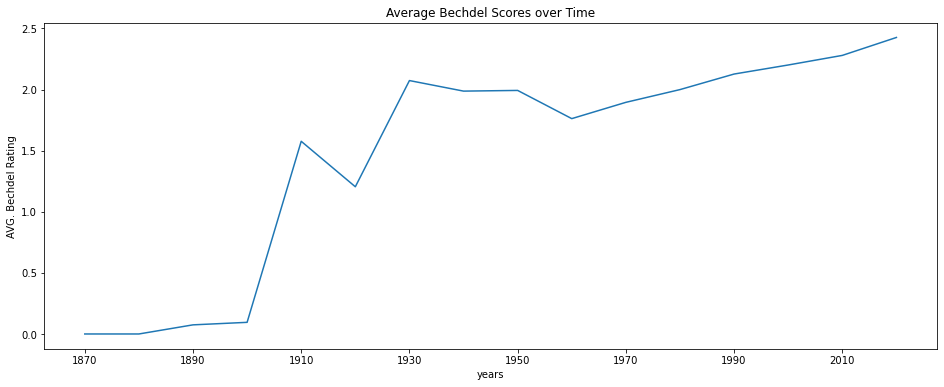

In [12]:
plt.figure(figsize=(16, 6))

bechdel_test_df_by_decades.plot.line()
plt.title('Average Bechdel Scores over Time')
plt.xlabel('years')
plt.ylabel('AVG. Bechdel Rating')

plt.show;

In [13]:
imdb_df = pd.read_csv('imdb_top_movies.csv', usecols=['imdbid', 'Name', 'Year'])
imdb_df.imdbid = imdb_df.imdbid.astype(str)
bechdel_test_df.imdbid=bechdel_test_df.imdbid.astype(str)
bechdel_imdb = pd.merge(bechdel_test_df, imdb_df, how='left', on='imdbid', indicator=True)
display(bechdel_imdb)

print('Percentage of passed and non-passed  top 250 movies:')
bechdel_imdb[bechdel_imdb['_merge']=='both']['rating'].value_counts(normalize=True).mul(100)

,rating,title,year,imdbid,id,decade_id,Name,Year,_merge
0,0,Passage de Venus,1874,3155794,9602,1870,NaN,NaN,left_only
1,0,La Rosace Magique,1877,14495706,9804,1870,NaN,NaN,left_only
2,0,Sallie Gardner at a Gallop,1878,2221420,9603,1870,NaN,NaN,left_only
3,0,Le singe musicien,1878,12592084,9806,1870,NaN,NaN,left_only
4,0,Athlete Swinging a Pick,1881,7816420,9816,1880,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
9625,1,Nope,2022,10954984,10439,2020,NaN,NaN,left_only
9626,0,Thirteen Lives,2022,12262116,10441,2020,NaN,NaN,left_only
9627,3,Dragon Ball Super: Super Hero,2022,14614892,10443,2020,NaN,NaN,left_only
9628,0,Mad God,2022,15090124,10444,2020,NaN,NaN,left_only


Percentage of passed and non-passed  top 250 movies:


3    55.319149
1    36.170213
2     4.255319
0     4.255319
Name: rating, dtype: float64

In [14]:
print('Percentage of passed and non-passed, rest of the movies:')
bechdel_imdb[bechdel_imdb['_merge']=='left_only']['rating'].value_counts(normalize=True).mul(100)

Percentage of passed and non-passed, rest of the movies:


3    57.007200
1    21.694668
0    11.176041
2    10.122091
Name: rating, dtype: float64